**Part A**

**Step 2:Prepare the dataset**

In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/Machine learning/lab06

/content/drive/MyDrive/Colab Notebooks/Machine learning/lab06


In [3]:
!ls

 amazon_cells_labelled.txt
 imdb_labelled.txt
'Lab06: Bag-of-Words for Text Processing and Feature Extraction.ipynb'
 yelp_labelled.txt


**Step 3: View data format**

In [4]:
## View first 10 rows
!head yelp_labelled.txt

Wow... Loved this place.	1
Crust is not good.	0
Not tasty and the texture was just nasty.	0
Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.	1
The selection on the menu was great and so were the prices.	1
Now I am getting angry and I want my damn pho.	0
Honeslty it didn't taste THAT fresh.)	0
The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.	0
The fries were great too.	1
A great touch.	1


In [5]:
import pandas as pd
yelp_df = pd.read_csv('yelp_labelled.txt', names=['sentence', 'label'], sep='\t')
yelp_df

,sentence,label
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [6]:
print(yelp_df["label"].value_counts())

1    500
0    500
Name: label, dtype: int64


In [7]:
amazon_df = pd.read_csv('amazon_cells_labelled.txt', names=['sentence', 'label'], sep='\t')
print(amazon_df["label"].value_counts())

0    500
1    500
Name: label, dtype: int64


In [8]:
imdb_df = pd.read_csv('imdb_labelled.txt', names=['sentence', 'label'], sep='\t')
print(imdb_df["label"].value_counts())

1    386
0    362
Name: label, dtype: int64


**Step 4: Data preprocessing**

**4.1 Bag-of-words:**


**a. Creating 'corpus': collecting all texts for training a ML model**

In [9]:
# Step 4.1a. get corpus from Yelp dataset
yelp_sentence = yelp_df['sentence'].to_list()
yelp_sentence

['Wow... Loved this place.',
 'Crust is not good.',
 'Not tasty and the texture was just nasty.',
 'Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.',
 'The selection on the menu was great and so were the prices.',
 'Now I am getting angry and I want my damn pho.',
 "Honeslty it didn't taste THAT fresh.)",
 'The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.',
 'The fries were great too.',
 'A great touch.',
 'Service was very prompt.',
 'Would not go back.',
 'The cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced.',
 'I tried the Cape Cod ravoli, chicken,with cranberry...mmmm!',
 'I was disgusted because I was pretty sure that was human hair.',
 'I was shocked because no signs indicate cash only.',
 'Highly recommended.',
 'Waitress was a little slow in service.',
 'This place is not worth your time, let alone Vegas.',
 'did not like at all.'

In [10]:
len(yelp_sentence)

1000

**b. Creating vocabulary: collecting all unique words in all sentences. Create a vocabulary of all unique words by assigning index to each word.**

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
# # Step 4.1b. creating vocabulary to map words into their index using CountVectorizer provided by the scikit-learn library
vectorizer = CountVectorizer(min_df=0, lowercase=False, stop_words='english') # will also remove punctuation or stop words

print("Test sequence: ",yelp_sentence[0:2])
vectorizer.fit(yelp_sentence[0:2]) # test the vocabulary on first two sentences
print("Vocabulary: ",vectorizer.vocabulary_)

Test sequence:  ['Wow... Loved this place.', 'Crust is not good.']
Vocabulary:  {'Wow': 2, 'Loved': 1, 'place': 4, 'Crust': 0, 'good': 3}


**c. Verctorize the sequence:**

In [12]:
## Step 4.1c.
print("Sequence: ",yelp_sentence[0:2])

vectorizer.fit(yelp_sentence[0:2]) # test the vocabulary on first two sentences
vectorizer.transform(yelp_sentence[0:2]).toarray()

Sequence:  ['Wow... Loved this place.', 'Crust is not good.']


array([[0, 1, 1, 0, 1],
       [1, 0, 0, 1, 0]])

In [13]:
vectorizer.transform(["Loved the place. Loved the place. "]).toarray()

array([[0, 2, 0, 0, 2]])

**Step 5: Vectorize the training/testing dataset**

In [14]:
from sklearn.model_selection import train_test_split
yelp_train, yelp_test = train_test_split(yelp_df,test_size=0.2, random_state=42) #train = 0.8, test = 0.2


In [15]:
print("yelp_train.shape: ", yelp_train.shape)
print("yelp_test.shape: ", yelp_test.shape)

yelp_train.shape:  (800, 2)
yelp_test.shape:  (200, 2)


**a. Generate vocabulary from the training data**

In [16]:
## Step 5.1:Vectorize the training/testing dataset
# train
from sklearn.feature_extraction.text import CountVectorizer
yelp_sentence_train = yelp_train['sentence'].to_list()
# print(len(yelp_sentence_train))

#test
from sklearn.feature_extraction.text import CountVectorizer
yelp_sentence_test = yelp_test['sentence'].to_list()
# print(len(yelp_sentence_test))

vectorizer = CountVectorizer(min_df=0, lowercase=False,stop_words='english') # will also remove punctuation or stop words
vectorizer.fit(yelp_sentence_train) ### fit on the whole dataset




CountVectorizer(lowercase=False, min_df=0, stop_words='english')

**b. Check the vocabulary**

In [17]:
## Step 5.2:check the vocabulary
print("Vocabulary: ",vectorizer.vocabulary_)
print("Vocabulary words: ",vectorizer.vocabulary_.keys())
print("Vocabulary index: ",vectorizer.vocabulary_.values())

Vocabulary:  {'The': 376, 'worst': 1804, 'salmon': 1475, 'sashimi': 1482, 'An': 31, 'excellent': 835, 'new': 1237, 'restaurant': 1440, 'experienced': 843, 'Frenchman': 149, 'Went': 418, 'lunch': 1158, 'service': 1518, 'slow': 1551, 'think': 1665, 'suffers': 1624, 'trying': 1701, 'hard': 988, 'Just': 210, 'great': 950, 'experience': 842, 'got': 942, 'home': 1020, 'driest': 792, 'damn': 708, 'wings': 1788, 'DELICIOUS': 104, 'They': 381, 'brought': 565, 'fresh': 909, 'batch': 508, 'fries': 914, 'thinking': 1666, 'yay': 1812, 'warm': 1759, 'And': 32, 'tragedy': 1688, 'struck': 1611, 'Awful': 45, 'Great': 166, 'food': 901, 'huge': 1038, 'portions': 1348, 'military': 1196, 'discount': 760, 'waiter': 1749, 'wasn': 1762, 'helpful': 1007, 'friendly': 912, 'rarely': 1399, 'checked': 610, 'barely': 504, 'stomach': 1601, 'meal': 1175, 'didn': 742, 'complain': 653, 'business': 578, 'For': 146, 'price': 1363, 'place': 1330, 'gone': 940, 'fried': 910, 'rice': 1452, 'dry': 799, 'Both': 65, 'truly': 16

**c. Create the feature vectors for each sentence of the training and testing set**

In [18]:
## Step 5.3:create feature vector for each sentence
X_train_yelp = vectorizer.transform(yelp_sentence_train).toarray()
X_test_yelp = vectorizer.transform(yelp_sentence_test).toarray()
print("Training matrix shape", X_train_yelp.shape)
print("Testing matrix shape", X_test_yelp.shape)

Training matrix shape (800, 1820)
Testing matrix shape (200, 1820)


In [19]:
print(len(vectorizer.vocabulary_.keys()))

1820


In [20]:
X_train_yelp

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

**Amazon dataset**

In [21]:
from sklearn.model_selection import train_test_split
amazon_train, amazon_test = train_test_split(amazon_df,test_size=0.2, random_state=42) #train = 0.8, test = 0.2

In [22]:
print("amazon_train.shape: ", amazon_train.shape)
print("amazon_test.shape: ", amazon_test.shape)

amazon_train.shape:  (800, 2)
amazon_test.shape:  (200, 2)


In [23]:
## Step 5.1:Vectorize the training/testing dataset
# train
from sklearn.feature_extraction.text import CountVectorizer
amazon_sentence_train = amazon_train['sentence'].to_list()
# print(len(amazon_sentence_train))

#test
from sklearn.feature_extraction.text import CountVectorizer
amazon_sentence_test = amazon_test['sentence'].to_list()
# print(len(amazon_sentence_test))

vectorizer2 = CountVectorizer(min_df=0, lowercase=False,stop_words='english') # will also remove punctuation or stop words
vectorizer2.fit(amazon_sentence_train) ### fit on the whole dataset




CountVectorizer(lowercase=False, min_df=0, stop_words='english')

In [24]:
## Step 5.2:check the vocabulary
print("Vocabulary: ",vectorizer2.vocabulary_)
print("Vocabulary words: ",vectorizer2.vocabulary_.keys())
print("Vocabulary index: ",vectorizer2.vocabulary_.values())

Vocabulary:  {'Doesn': 139, 'hold': 992, 'charge': 617, 'All': 45, 'took': 1589, 'drop': 789, 'inches': 1021, 'kitchen': 1065, 'counter': 700, 'cracked': 706, 'impressed': 1018, 'laughing': 1079, 'Do': 137, 'NOT': 264, 'buy': 580, 'want': 1657, 'use': 1634, 'holster': 995, 'purchased': 1327, 'family': 871, 'friends': 915, 'enjoy': 826, 'clarity': 632, 'ease': 808, 'Horrible': 202, 'horrible': 998, 'protector': 1320, 'Piece': 306, 'trash': 1599, 'Great': 187, 'Value': 421, 'Works': 452, 'Plug': 311, 'wrong': 1707, 'size': 1472, 'Awkward': 64, 'unreliable': 1624, 'The': 386, 'big': 543, 'drawback': 787, 'MP3': 248, 'player': 1281, 'buttons': 579, 'phone': 1264, 'cover': 703, 'let': 1084, 'pause': 1252, 'skip': 1475, 'songs': 1495, 'lock': 1101, 'seconds': 1423, 'During': 146, 'different': 754, 'minute': 1160, 'calls': 587, 'experienced': 854, 'drops': 792, 'area': 502, 'bars': 523, 'Motorola': 258, 'finally': 886, 'got': 955, 'voice': 1648, 'quality': 1332, 'bluetooth': 553, 'headset': 9

In [25]:
## Step 5.3:create feature vector for each sentence
X_train_amazon = vectorizer2.transform(amazon_sentence_train).toarray()
X_test_amazon = vectorizer2.transform(amazon_sentence_test).toarray()
print("Training matrix shape", X_train_amazon.shape)
print("Testing matrix shape", X_test_amazon.shape)

Training matrix shape (800, 1713)
Testing matrix shape (200, 1713)


In [26]:
print(len(vectorizer2.vocabulary_.keys()))

1713


**IMDb dataset**

In [27]:
from sklearn.model_selection import train_test_split
imdb_train, imdb_test = train_test_split(imdb_df,test_size=0.2, random_state=42) #train = 0.8, test = 0.2

In [28]:
print("imdb_train.shape: ", imdb_train.shape)
print("imdb_test.shape: ", imdb_test.shape)

imdb_train.shape:  (598, 2)
imdb_test.shape:  (150, 2)


In [29]:
## Step 5.1:Vectorize the training/testing dataset
# train
from sklearn.feature_extraction.text import CountVectorizer
imdb_sentence_train = imdb_train['sentence'].to_list()
# print(len(imdb_sentence_train))

#test
from sklearn.feature_extraction.text import CountVectorizer
imdb_sentence_test = imdb_test['sentence'].to_list()
# print(len(imdb_sentence_test))

vectorizer3 = CountVectorizer(min_df=0, lowercase=False,stop_words='english') # will also remove punctuation or stop words
vectorizer3.fit(imdb_sentence_train) ### fit on the whole dataset




CountVectorizer(lowercase=False, min_df=0, stop_words='english')

In [30]:
## Step 5.2:check the vocabulary
print("Vocabulary: ",vectorizer3.vocabulary_)
print("Vocabulary words: ",vectorizer3.vocabulary_.keys())
print("Vocabulary index: ",vectorizer3.vocabulary_.values())

Vocabulary:  {'This': 592, 'film': 1363, 'highlights': 1535, 'fundamental': 1423, 'flaws': 1385, 'legal': 1702, 'process': 2046, 'discovering': 1158, 'guilt': 1489, 'innocence': 1610, 'presents': 2035, 'better': 827, 'court': 1046, 'movie': 1841, 'suffered': 2416, 'writing': 2735, 'needed': 1864, 'suspense': 2438, 'Very': 632, 'disappointing': 1153, 'There': 587, 'moments': 1826, 'just': 1659, 'didn': 1140, 'need': 1863, 'excruciatingly': 1286, 'slow': 2311, 'moving': 1843, 've': 2630, 'seen': 2238, 'soap': 2320, 'operas': 1908, 'intelligent': 1627, 'liked': 1719, 'While': 659, 'don': 1180, 'hear': 1517, 'Mickey': 411, 'speak': 2342, 'tons': 2519, 'sound': 2337, 'effects': 1221, 'music': 1849, 'granted': 1474, 'huge': 1566, 'crowd': 1067, 'pleaser': 1995, '1928': 6, 'The': 584, 'characters': 928, 'fleshed': 1386, 'surprisingly': 2434, 'particularly': 1946, 'Grimes': 269, 'Blake': 95, 'actors': 700, 'deliver': 1105, 'sharply': 2266, 'scripted': 2227, 'lines': 1725, 'right': 2173, 'deadp

In [31]:
## Step 5.3:create feature vector for each sentence
X_train_imdb = vectorizer3.transform(imdb_sentence_train).toarray()
X_test_imdb = vectorizer3.transform(imdb_sentence_test).toarray()
print("Training matrix shape", X_train_imdb.shape)
print("Testing matrix shape", X_test_imdb.shape)

Training matrix shape (598, 2750)
Testing matrix shape (150, 2750)


In [32]:
print(len(vectorizer3.vocabulary_.keys()))

2750


**Part B**

**Task 2: Prepare the dataset from Lab06-A**

* We have 3 df with same columns, .concat() can combine all df to one df.
* ref: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

In [33]:
yelp_df

,sentence,label
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [34]:
amazon_df

,sentence,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
995,The screen does get smudged easily because it ...,0
996,What a piece of junk.. I lose more calls on th...,0
997,Item Does Not Match Picture.,0
998,The only thing that disappoint me is the infra...,0


In [35]:
imdb_df

,sentence,label
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
...,...,...
743,I just got bored watching Jessice Lange take h...,0
744,"Unfortunately, any virtue in this film's produ...",0
745,"In a word, it is embarrassing.",0
746,Exceptionally bad!,0


In [36]:
df = [yelp_df, amazon_df, imdb_df]
combine_df = pd.concat(df)

In [37]:
combine_df

,sentence,label
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
743,I just got bored watching Jessice Lange take h...,0
744,"Unfortunately, any virtue in this film's produ...",0
745,"In a word, it is embarrassing.",0
746,Exceptionally bad!,0


**Task 3: Dividing the full dataset into separate training and test dataset**

In [38]:
from sklearn.model_selection import train_test_split
combine_train, combine_test = train_test_split(combine_df,test_size=0.25, random_state=42) #train = 0.75, test = 0.25

In [39]:
print("combine_train.shape: ", combine_train.shape)
print("combine_test.shape: ", combine_test.shape)

combine_train.shape:  (2061, 2)
combine_test.shape:  (687, 2)


**Task 4: Report the frequency of classes (positive, negative classes) in train, and test set. Are they balanced?**

In [40]:
print(combine_train["label"].value_counts())

1    1054
0    1007
Name: label, dtype: int64


In [41]:
print(combine_test["label"].value_counts())

0    355
1    332
Name: label, dtype: int64


**Task 5: Fit the Logistic regression on the training dataset.**

 * In part B, I use TfidfVectorizer to replace CountVectorizer, it combines all the options of CountVectorizer and TfidfTransformer in a single model. default is lowercase == True, and norm == "l2" 

In [60]:
## Step 5.1:Vectorize the training/testing dataset
# train
from sklearn.feature_extraction.text import TfidfVectorizer
combine_train_list = combine_train['sentence'].to_list()
# print(len(combine_train_list))


#test
combine_test_list = combine_test['sentence'].to_list()
# print(len(combine_test_list))

vectorizer4 = TfidfVectorizer() # will also remove punctuation or stop words
vectorizer4.fit(combine_train_list) ### fit on the whole dataset


TfidfVectorizer()

In [147]:
combine_train_list[0]

'We sat another ten minutes and finally gave up and left.'

In [61]:
## Step 5.2:check the vocabulary
print("Vocabulary: ",vectorizer4.vocabulary_)
print("Vocabulary words: ",vectorizer4.vocabulary_.keys())
print("Vocabulary index: ",vectorizer4.vocabulary_.values())

Vocabulary:  {'we': 4189, 'sat': 3251, 'another': 190, 'ten': 3787, 'minutes': 2421, 'and': 173, 'finally': 1464, 'gave': 1615, 'up': 4049, 'left': 2179, 'you': 4320, 'can': 562, 'find': 1466, 'better': 384, 'movies': 2477, 'at': 256, 'youtube': 4326, 'excellent': 1339, 'bluetooth': 428, 'headset': 1785, 'the': 3806, 'guy': 1724, 'who': 4224, 'said': 3229, 'he': 1780, 'had': 1731, 'dialogue': 1044, 'with': 4258, 'his': 1838, 'potted': 2880, 'plants': 2822, 'has': 1765, 'it': 2043, 'right': 3170, 'real': 3036, 'killer': 2110, 'is': 2038, 'volume': 4131, 'of': 2602, 'course': 874, 'breaking': 478, 'obviously': 2594, 'there': 3819, 'problem': 2917, 'adhesive': 111, 'still': 3618, 'do': 1111, 'like': 2207, 'this': 3831, 'movie': 2476, 'for': 1531, 'empowerment': 1263, 'women': 4264, 'not': 2571, 'enough': 1285, 'out': 2661, 'one': 2625, 'wants': 4155, 'to': 3874, 'surf': 3717, 'on': 2623, 'small': 3477, 'wave': 4182, 'space': 3535, 'in': 1952, '1998': 17, 'deep': 983, 'impact': 1938, 'arma

In [62]:
## Step 5.3:create feature vector for each sentence
X_train_combine = vectorizer4.transform(combine_train_list).toarray()
X_test_combine = vectorizer4.transform(combine_test_list).toarray()
print("Training matrix shape", X_train_combine.shape)
print("Testing matrix shape", X_test_combine.shape)


Training matrix shape (2061, 4337)
Testing matrix shape (687, 4337)


In [63]:
type(X_train_combine)

numpy.ndarray

In [64]:
## create label
import numpy as np

Y_train_combine_label = np.array(combine_train['label'].to_list())
Y_test_combine_label = np.array(combine_test['label'].to_list())
print("Training label shape", Y_train_combine_label.shape)
print("Testing label shape", Y_test_combine_label.shape)

Training label shape (2061,)
Testing label shape (687,)


In [65]:
combine_train.head()

,sentence,label
350,We sat another ten minutes and finally gave up...,0
519,You can find better movies at youtube.,0
44,Excellent bluetooth headset.,1
151,The guy who said he's had better dialogue with...,0
601,"The real killer is the volume, and of course i...",0


In [66]:
Y_train_combine_label[0:5]

array([0, 0, 1, 0, 0])

In [67]:
combine_test.head()

,sentence,label
516,The attractive set used throughout most of the...,1
642,This was one of the worst films i have ever se...,0
359,"The microphone also works well, but (according...",1
702,* Comes with a strong light that you can use t...,1
660,The acting is like watching wooden puppets mov...,0


In [68]:
Y_test_combine_label[0:5]

array([1, 0, 1, 1, 0])

In [69]:
from sklearn.linear_model import LogisticRegression 
log_reg = LogisticRegression()
log_reg.fit(X_train_combine, Y_train_combine_label)

LogisticRegression()

In [70]:
import pickle
filename = 'log_model.sav'
pickle.dump(log_reg, open(filename, 'wb'))
log_reg_model = pickle.load(open(filename, 'rb'))

**Task 6:  Report 10-fold cross validation accuracy on the training data, and visualize the scores in Boxplot.**

In [71]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(log_reg_model, X_train_combine, Y_train_combine_label, cv=10, scoring="accuracy")
print(score)

[0.82608696 0.81067961 0.77184466 0.81553398 0.78640777 0.82524272
 0.81553398 0.7961165  0.85436893 0.7815534 ]


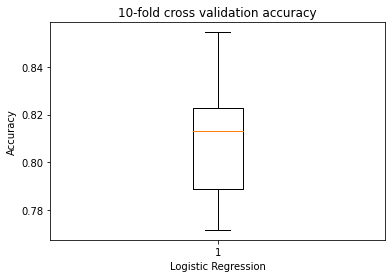

In [72]:
import matplotlib.pyplot as plt
plt.title("10-fold cross validation accuracy")
plt.xlabel("Logistic Regression")
plt.ylabel("Accuracy")
plt.boxplot(score)
plt.show()

**Task 7:  Report the accuracy/precision/recall/f1-score of Logistic Regression on the test dataset**

In [73]:
y_test_pred = log_reg_model.predict(X_test_combine)

In [74]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("precision_score: ", precision_score(Y_test_combine_label, y_test_pred))
print("recall_score: ", recall_score(Y_test_combine_label, y_test_pred))
print("f1_score: ", f1_score(Y_test_combine_label, y_test_pred))

precision_score:  0.8179012345679012
recall_score:  0.7981927710843374
f1_score:  0.8079268292682926


**Task 8: Draw the ROC curve of Logistic Regression on the test dataset**

In [75]:
from sklearn.model_selection import cross_val_predict
test_score_log = cross_val_predict(log_reg_model, X_test_combine, Y_test_combine_label, cv=10, method="decision_function")

In [76]:
from sklearn.metrics import roc_curve
fpr_log, tpr_log, thresholds_log = roc_curve(Y_test_combine_label, test_score_log)

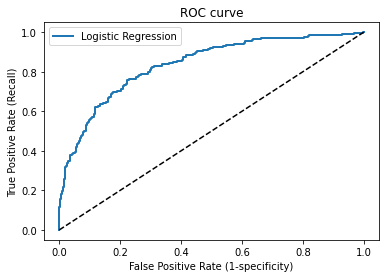

In [77]:
def plot_roc_curve(fpr, tpr, label=None): 
  plt.plot(fpr, tpr, linewidth=2, label="Logistic Regression") 
  plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal 
  plt.xlabel("False Positive Rate (1-specificity)")
  plt.ylabel("True Positive Rate (Recall)")
  plt.title("ROC curve")
  plt.legend()
  
plot_roc_curve(fpr_log, tpr_log)
plt.show()

One way to compare classifiers is to measure the area under the curve (AUC). A per‐ fect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5. Scikit-Learn provides a function to compute the ROC AUC:

In [78]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test_combine_label, test_score_log)

0.837765145087392

**Task 9:  Apply Tasks 5-8 on the following machine learning models:**

**1. LDA**

In [79]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train_combine, Y_train_combine_label)

LinearDiscriminantAnalysis()

In [80]:
import pickle
filename = 'LDA_model.sav'
pickle.dump(LDA, open(filename, 'wb'))
LDA_model = pickle.load(open(filename, 'rb'))

In [81]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(LDA_model, X_train_combine, Y_train_combine_label, cv=10, scoring="accuracy")
print(score)

[0.66183575 0.66990291 0.61650485 0.64563107 0.66019417 0.65533981
 0.69902913 0.62621359 0.6407767  0.62135922]


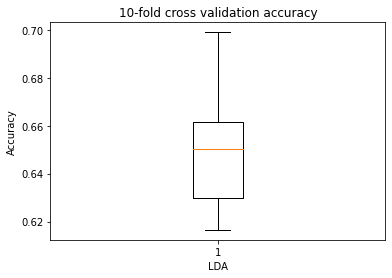

In [82]:
import matplotlib.pyplot as plt
plt.title("10-fold cross validation accuracy")
plt.xlabel("LDA")
plt.ylabel("Accuracy")
plt.boxplot(score)
plt.show()

In [83]:
y_test_pred_LDA = LDA_model.predict(X_test_combine)

In [84]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("precision_score: ", precision_score(Y_test_combine_label, y_test_pred_LDA))
print("recall_score: ", recall_score(Y_test_combine_label, y_test_pred_LDA))
print("f1_score: ", f1_score(Y_test_combine_label, y_test_pred_LDA))

precision_score:  0.6368715083798883
recall_score:  0.6867469879518072
f1_score:  0.6608695652173914


In [85]:
from sklearn.model_selection import cross_val_predict
test_score_LDA = cross_val_predict(LDA_model, X_test_combine, Y_test_combine_label, cv=10,method="decision_function")

In [86]:
from sklearn.metrics import roc_curve
fpr_LDA, tpr_LDA, thresholds_LDA = roc_curve(Y_test_combine_label, test_score_LDA)

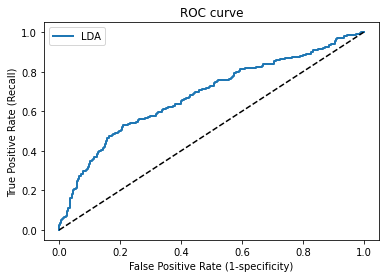

In [87]:
def plot_roc_curve(fpr, tpr, label=None): 
  plt.plot(fpr, tpr, linewidth=2, label="LDA") 
  plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal 
  plt.xlabel("False Positive Rate (1-specificity)")
  plt.ylabel("True Positive Rate (Recall)")
  plt.title("ROC curve")
  plt.legend()
  
plot_roc_curve(fpr_LDA, tpr_LDA)
plt.show()

In [88]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test_combine_label, test_score_LDA)

0.6815289326319361

**2. QDA**

In [89]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
QDA = QuadraticDiscriminantAnalysis()
QDA.fit(X_train_combine, Y_train_combine_label)

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

In [90]:
import pickle
filename = 'QDA_model.sav'
pickle.dump(QDA, open(filename, 'wb'))
QDA_model = pickle.load(open(filename, 'rb'))

In [91]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(QDA_model, X_train_combine, Y_train_combine_label, cv=10, scoring="accuracy")
print(score)

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminan

[0.53140097 0.51941748 0.54854369 0.48058252 0.52427184 0.49514563
 0.55825243 0.55339806 0.57281553 0.51941748]


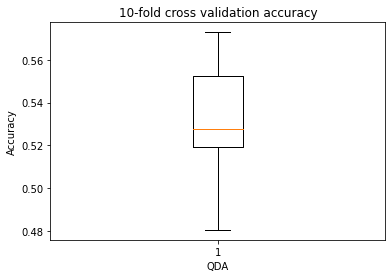

In [92]:
import matplotlib.pyplot as plt
plt.title("10-fold cross validation accuracy")
plt.xlabel("QDA")
plt.ylabel("Accuracy")
plt.boxplot(score)
plt.show()

In [93]:
y_test_pred_QDA = QDA_model.predict(X_test_combine)

In [94]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("precision_score: ", precision_score(Y_test_combine_label, y_test_pred_QDA))
print("recall_score: ", recall_score(Y_test_combine_label, y_test_pred_QDA))
print("f1_score: ", f1_score(Y_test_combine_label, y_test_pred_QDA))

precision_score:  0.6390977443609023
recall_score:  0.2560240963855422
f1_score:  0.3655913978494623


In [95]:
from sklearn.model_selection import cross_val_predict
test_score_QDA = cross_val_predict(QDA_model, X_test_combine, Y_test_combine_label, cv=10, method="decision_function")

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminan

In [96]:
from sklearn.metrics import roc_curve
fpr_QDA, tpr_QDA, thresholds_QDA = roc_curve(Y_test_combine_label, test_score_QDA)

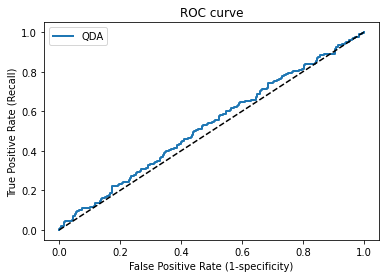

In [97]:
def plot_roc_curve(fpr, tpr, label=None): 
  plt.plot(fpr, tpr, linewidth=2, label="QDA") 
  plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal 
  plt.xlabel("False Positive Rate (1-specificity)")
  plt.ylabel("True Positive Rate (Recall)")
  plt.title("ROC curve")
  plt.legend()
  
plot_roc_curve(fpr_QDA, tpr_QDA)
plt.show()

In [98]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test_combine_label, test_score_QDA)

0.5280671983709486

**3. Naive bayes**

In [100]:
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()
NB.fit(X_train_combine, Y_train_combine_label)

MultinomialNB()

In [101]:
import pickle
filename = 'NB_model.sav'
pickle.dump(NB, open(filename, 'wb'))
NB_model = pickle.load(open(filename, 'rb'))

In [102]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(NB_model, X_train_combine, Y_train_combine_label, cv=10, scoring="accuracy")
print(score)

[0.84057971 0.83495146 0.75242718 0.80582524 0.7961165  0.86407767
 0.83495146 0.83495146 0.82524272 0.77669903]


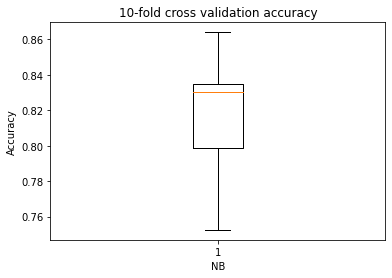

In [103]:
import matplotlib.pyplot as plt
plt.title("10-fold cross validation accuracy")
plt.xlabel("NB")
plt.ylabel("Accuracy")
plt.boxplot(score)
plt.show()

In [104]:
y_test_pred_NB = NB_model.predict(X_test_combine)

In [105]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("precision_score: ", precision_score(Y_test_combine_label, y_test_pred_NB))
print("recall_score: ", recall_score(Y_test_combine_label, y_test_pred_NB))
print("f1_score: ", f1_score(Y_test_combine_label, y_test_pred_NB))

precision_score:  0.8132911392405063
recall_score:  0.7740963855421686
f1_score:  0.7932098765432098


In [106]:
from sklearn.model_selection import cross_val_predict
test_score_NB = cross_val_predict(NB_model, X_test_combine, Y_test_combine_label, cv=10, method="predict_proba")

Predictionsndarray

This is the result of calling method. Shape:

When method is ‘predict’ and in special case where method is ‘decision_function’ and the target is binary: (n_samples,)

When method is one of {‘predict_proba’, ‘predict_log_proba’, ‘decision_function’} (unless special case above): (n_samples, n_classes)

If estimator is multioutput, an extra dimension ‘n_outputs’ is added to the end of each shape above.

In [107]:
print(test_score_NB[:,1])

[0.47264455 0.23218076 0.69703645 0.50361928 0.35060847 0.59236113
 0.52364979 0.40451121 0.36483112 0.39541046 0.29901845 0.68481417
 0.54048602 0.52422677 0.34105477 0.54461845 0.46604996 0.37342416
 0.41514403 0.48783883 0.42913023 0.44791148 0.31347312 0.42255163
 0.64500523 0.68665848 0.29091798 0.41806305 0.48720296 0.3620837
 0.21652503 0.71429527 0.43262931 0.59001947 0.42536013 0.44518382
 0.6537156  0.31394483 0.38984632 0.56652676 0.51811199 0.59209814
 0.47378888 0.54269388 0.40604391 0.4841892  0.54275733 0.4727172
 0.30090265 0.37525118 0.55989008 0.47596193 0.54864708 0.5807918
 0.4372257  0.55033004 0.44270532 0.53325856 0.34526233 0.55479173
 0.60493813 0.64698131 0.27841357 0.36980055 0.1760962  0.71364968
 0.37270893 0.66163477 0.28308195 0.43009642 0.34858283 0.39991821
 0.52135827 0.89719223 0.37258419 0.46638725 0.34512033 0.41231848
 0.30097003 0.3760348  0.47970839 0.35137664 0.57195252 0.54483926
 0.54640705 0.39685189 0.40664842 0.64814833 0.46528565 0.4267077

In [108]:
from sklearn.metrics import roc_curve
fpr_NB, tpr_NB, thresholds_NB = roc_curve(Y_test_combine_label,test_score_NB[:,1])

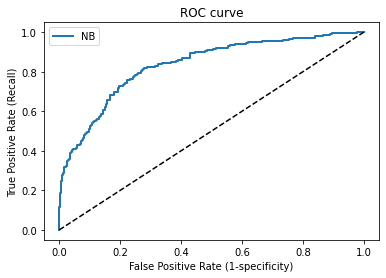

In [109]:
def plot_roc_curve(fpr, tpr, label=None): 
  plt.plot(fpr, tpr, linewidth=2, label="NB") 
  plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal 
  plt.xlabel("False Positive Rate (1-specificity)")
  plt.ylabel("True Positive Rate (Recall)")
  plt.title("ROC curve")
  plt.legend()
  
plot_roc_curve(fpr_NB, tpr_NB)
plt.show()

In [110]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test_combine_label, test_score_NB[:,1])

0.8338791786865773

**4. Support Vector Machine (set probability=True in argument)**

In [111]:
from sklearn.svm import SVC
SVC = SVC(probability=True)
SVC.fit(X_train_combine, Y_train_combine_label)

SVC(probability=True)

In [112]:
import pickle
filename = 'SVC_model.sav'
pickle.dump(SVC, open(filename, 'wb'))
SVC_model = pickle.load(open(filename, 'rb'))

In [113]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(SVC_model, X_train_combine, Y_train_combine_label, cv=10, scoring="accuracy")
print(score)

[0.84057971 0.83495146 0.76213592 0.84466019 0.80097087 0.82524272
 0.82038835 0.82038835 0.83980583 0.7815534 ]


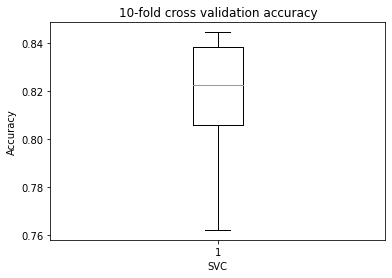

In [114]:
import matplotlib.pyplot as plt
plt.title("10-fold cross validation accuracy")
plt.xlabel("SVC")
plt.ylabel("Accuracy")
plt.boxplot(score)
plt.show()

In [115]:
y_test_pred_SVC = SVC_model.predict(X_test_combine)

In [116]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("precision_score: ", precision_score(Y_test_combine_label, y_test_pred_SVC))
print("recall_score: ", recall_score(Y_test_combine_label, y_test_pred_SVC))
print("f1_score: ", f1_score(Y_test_combine_label, y_test_pred_SVC))

precision_score:  0.8386075949367089
recall_score:  0.7981927710843374
f1_score:  0.8179012345679012


In [117]:
from sklearn.model_selection import cross_val_predict
test_score_SVC = cross_val_predict(SVC_model, X_test_combine, Y_test_combine_label, cv=10, method="predict_proba")

In [118]:
print(test_score_SVC[:,1])

[0.53665721 0.05138261 0.93446282 0.57254053 0.25907929 0.80223992
 0.5942859  0.40983978 0.25044357 0.3602498  0.11948006 0.91275142
 0.84571946 0.88211333 0.13946373 0.64108842 0.29078639 0.26917013
 0.76560706 0.55052255 0.23476223 0.31008842 0.1709641  0.63565161
 0.85343159 0.98337246 0.03456245 0.33179823 0.4714539  0.31730079
 0.01251395 0.9667161  0.39371118 0.54149604 0.23227365 0.6208464
 0.88464314 0.10381092 0.23514572 0.82371127 0.37953702 0.74802956
 0.39992741 0.51354857 0.26239103 0.5259154  0.83678647 0.49150451
 0.06039352 0.20023588 0.71246908 0.34865035 0.87015784 0.81965399
 0.43611214 0.57088315 0.41735154 0.67230821 0.16488893 0.78757515
 0.85217864 0.79084658 0.15414848 0.14706952 0.03508877 0.88628977
 0.20073868 0.95885541 0.14873804 0.3216217  0.14920553 0.30664504
 0.66236116 0.99999251 0.44439699 0.35255695 0.49064239 0.12329527
 0.09054773 0.18917151 0.27900217 0.1444666  0.74627658 0.66902929
 0.5722554  0.4939403  0.22814812 0.87298846 0.48844114 0.34494

In [119]:
from sklearn.metrics import roc_curve
fpr_SVC, tpr_SVC, thresholds_SVC = roc_curve(Y_test_combine_label,test_score_SVC[:,1])

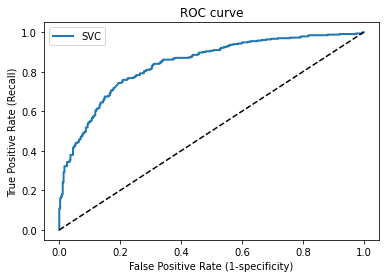

In [120]:
def plot_roc_curve(fpr, tpr, label=None): 
  plt.plot(fpr, tpr, linewidth=2, label="SVC") 
  plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal 
  plt.xlabel("False Positive Rate (1-specificity)")
  plt.ylabel("True Positive Rate (Recall)")
  plt.title("ROC curve")
  plt.legend()
  
plot_roc_curve(fpr_SVC, tpr_SVC)
plt.show()

In [121]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test_combine_label, test_score_SVC[:,1])

0.8398778211437299

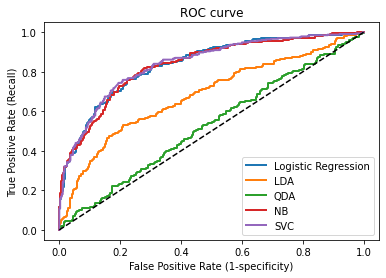

In [122]:
plt.plot(fpr_log, tpr_log, linewidth=2, label="Logistic Regression")
plt.plot(fpr_LDA, tpr_LDA, linewidth=2, label="LDA")
plt.plot(fpr_QDA, tpr_QDA, linewidth=2, label="QDA")
plt.plot(fpr_NB, tpr_NB, linewidth=2, label="NB")
plt.plot(fpr_SVC, tpr_SVC, linewidth=2, label="SVC") 
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal 
plt.xlabel("False Positive Rate (1-specificity)")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC curve")
plt.legend()

**Gradio**

In [123]:
!pip install --quiet gradio

     |████████████████████████████████| 5.3 MB 5.0 MB/s 
     |████████████████████████████████| 2.3 MB 42.8 MB/s 
     |████████████████████████████████| 55 kB 2.8 MB/s 
     |████████████████████████████████| 84 kB 2.0 MB/s 
     |████████████████████████████████| 54 kB 1.7 MB/s 
     |████████████████████████████████| 106 kB 41.0 MB/s 
     |████████████████████████████████| 212 kB 41.3 MB/s 
     |████████████████████████████████| 84 kB 2.2 MB/s 
     |████████████████████████████████| 56 kB 3.3 MB/s 
     |████████████████████████████████| 272 kB 57.8 MB/s 
     |████████████████████████████████| 63 kB 1.4 MB/s 
     |████████████████████████████████| 80 kB 6.9 MB/s 
     |████████████████████████████████| 68 kB 4.4 MB/s 
     |████████████████████████████████| 46 kB 3.3 MB/s 
     |████████████████████████████████| 4.0 MB 37.7 MB/s 
     |████████████████████████████████| 856 kB 46.3 MB/s 
     |████████████████████████████████| 593 kB 50.1 MB/s 


In [173]:
import gradio as gr
import pickle

input_module1 = gr.inputs.Textbox(label = "Review Comment")
input_module2 = gr.inputs.Dropdown(choices=["LDA_model", "QDA_model", "SVC_model", "NB_model", "Logistic"], label = "Methods")

output_module1 = gr.outputs.Textbox(label = "Predicted Class")
output_module2 = outputs=gr.Label(num_top_classes=10)

def Classification(input1,input2):
  label = ["Negative Feedback", "Positive Feedback"]
  x = [input1]
  test = vectorizer4.transform(x).toarray()

  with open('LDA_model.sav', 'rb') as f:
    LDA_model = pickle.load(f)
    
  with open('NB_model.sav', 'rb') as f:
    NB_model = pickle.load(f)
    
  with open('QDA_model.sav', 'rb') as f:
    QDA_model = pickle.load(f)
  
  with open('SVC_model.sav', 'rb') as f:
    SVC_model = pickle.load(f)

  with open('log_model.sav', 'rb') as f:
    log_model = pickle.load(f)

  if input2 == "LDA_model":
    pred = LDA_model.predict(test)
   
    if pred[0] == 1:
      output1 = "Positive Feedback"
    else:
      output1 = "Negative Feedback"
    
    
  elif input2 == "QDA_model":
    pred = QDA_model.predict(test)
    if pred[0] == 1:
      output1 = "Positive Feedback"
    else:
      output1 = "Negative Feedback"

  elif input2 == "SVC_model":
    pred = SVC_model.predict(test)
    if pred[0] == 1:
      output1 = "Positive Feedback"
    else:
      output1 = "Negative Feedback"

  elif input2 == "NB_model":
    pred = NB_model.predict(test)
    if pred[0] == 1:
      output1 = "Positive Feedback"
    else:
      output1 = "Negative Feedback"

  elif input2 == "Logistic":
    pred = log_model.predict(test)
    if pred[0] == 1:
      output1 = "Positive Feedback"
    else:
      output1 = "Negative Feedback"
  
  confidences = {label[i]: 1 if i == pred[0] else 0 for i in range(len(label))}
  
  return output1,confidences 

gr.Interface(fn=Classification, 
             inputs = [input_module1, input_module2],
             outputs = [output_module1,output_module2],
             title = 'Lab06: Bag-of-Words',
             description="Words classification.",
             ).launch()

/usr/local/lib/python3.7/dist-packages/gradio/inputs.py:27: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  "Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `numeric` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)
/usr/local/lib/python3.7/dist-packages/gradio/inputs.py:217: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import y

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://d1dc0a42c98d53a4.gradio.app

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x7fc635a90d10>,
 'http://127.0.0.1:7862/',
 'https://d1dc0a42c98d53a4.gradio.app')

In [172]:
a = "this homework is interesting"
x = [a]
print(x)
test = vectorizer4.transform(x).toarray()
pred = NB_model.predict(test)
print(pred)


['this homework is interesting']
[1]
